<h1 style="margin-bottom:-10px;">Hotel Review Sentiment Analysis </h1>
<h3 style="color:#FA5F55;">NLP Implementation using TF-IDF </h3>
<hr >

## 1. Importing data

In [16]:
import pandas as pd 
# Importing from kaggle
Reviewdata = pd.read_csv('C:\\Users\\AREFA\\Documents\\DataScienceProjects\\data-science-environment\\archive\\train.csv')

The link for dataset:  https://www.kaggle.com/anu0012/hotel-review/data

## 2. EDA

In [17]:
Reviewdata.shape

(38932, 5)

In [18]:
Reviewdata.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy


In [19]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [20]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


Percentages of happy and not happy responses

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


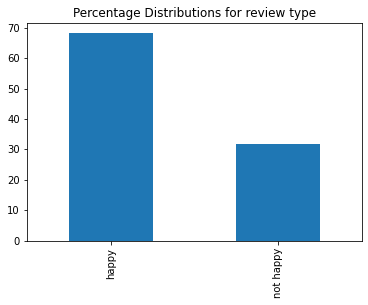

In [22]:
# Visualizing distribution of responses
import matplotlib.pyplot as plt
%matplotlib inline

print('Percentages of happy and not happy responses\n')
normalized_perc = round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2)
print(normalized_perc)
normalized_perc.plot(kind='bar')
plt.title('Percentage Distributions for review type')
plt.show()

## 3. Data Cleaning

In [21]:
# Checking missing values 
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,keys=['Count','Percentage'])

print('Count and percentage of missing values for each column is:')
missing_data

Count and percentage of missing values for each column is:


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


In [23]:
# Removing columns which won't be used for training
Reviewdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)
Reviewdata

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [24]:
# Applying text cleaning
import re
# A regular expression (or RE) specifies a set of strings that matches it
# the functions in this module let you check if a particular string matches a given regular expression

import string

def text_clean_1(text):
    # convert to lower case
    text = text.lower()
    # remove square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove numbers and punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #remove digits
    text = re.sub('\w*\d\w*', '', text)
    return text

# Lambda function that returns cleaned text
cleaned1 = lambda x: text_clean_1(x)

In [25]:
# Adding cleaned description
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [26]:
# Applying some more cleaning by replacing some text
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [27]:
# Cleaning our data again
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


## 3. Model Training

In [28]:
# Split training and testing data
from sklearn.model_selection import train_test_split

x_var = Reviewdata.cleaned_description_new
y_var = Reviewdata.Is_Response

x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.1, random_state = 225)

print('x_train :', len(x_train))
print('x_test  :', len(x_test))
print('y_train :', len(y_train))
print('y_test  :', len(y_test))

x_train : 35038
x_test  : 3894
y_train : 35038
y_test  : 3894


### TF-IDF vectorizer
- TF-IDF stands for Term Frequency Inverse Document Frequency of records. 
- It can be defined as the calculation of how relevant a word in a series or corpus is to a text.

##### Term Frequency: 
- In document d, the frequency represents the number of instances of a given word t.
- The weight of a term that occurs in a document is simply proportional to the term frequency.
> tf(t,d) = count of t in d / number of words in d

##### Document Frequency: 
- This tests the meaning of the text, which is very similar to TF, in the whole corpus collection.
> df(t) = occurrence of t in documents

##### Inverse Document Frequency: 
- Mainly, it tests how relevant the word is.
> df(t) = N(t)
where
df(t) = Document frequency of a term t
N(t) = Number of documents containing the term t
- The IDF of the word is the number of documents in the corpus separated by the frequency of the text.
> idf(t) = N/ df(t) = N/N(t)
- We then take the logarithm (with base 2) of the inverse frequency of the paper.
> idf(t) = log(N/ df(t))

##### TF-IDF
- Usually, the tf-idf weight consists of two terms-
  - Normalized Term Frequency (tf)
  - Inverse Document Frequency (idf)
- And is given by:
> tf-idf(t, d) = tf(t, d) * idf(t)

In [34]:
# Using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
# Applying logistic regression classifier 
# Algorithm used in optimization is lbfgs by default
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [33]:
# Creating a pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(x_train, y_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test)

confusion_matrix(predictions, y_test)

array([[2418,  305],
       [ 153, 1018]], dtype=int64)

## 4. Model Prediction

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, y_test, average = 'weighted'))

Accuracy :  0.8823831535695943
Precision :  0.8890590818181386
Recall :  0.8823831535695943


## 5. Predicting new reviews

In [32]:
example = ["I'm not happy with the services."]

result = model.predict(example)
print(result)

['happy']


So, the model has accuracy of around 88% and is able to predict whether a review was happy or not happy i.e. the target variable.